In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings




In [4]:

df = pd.read_csv(r"MallCustomers.csv")

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:

df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
print(df.head())
print("\n")
print(df.tail())

   customer_id  gender  age  annual_income  spending_score
0            1    Male   19             15              39
1            2    Male   21             15              81
2            3  Female   20             16               6
3            4  Female   23             16              77
4            5  Female   31             17              40


     customer_id  gender  age  annual_income  spending_score
195          196  Female   35            120              79
196          197  Female   45            126              28
197          198    Male   32            126              74
198          199    Male   32            137              18
199          200    Male   30            137              83


In [9]:
column_names = df.columns
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 200
Number of columns: 5


In [10]:
for column in column_names:
    if df[column].dtype == "object":
        df.drop(column, axis=1, inplace=True)

In [12]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### **Function to perform clustering with different distance metrics**

In [13]:
# Define a function to perform clustering with different distance metrics
def perform_clustering(distance_metric):
    
    distance_matrix = pdist(df_scaled, metric=distance_metric)
    distance_matrix = squareform(distance_matrix)


    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_clusters = kmeans.fit_predict(df_scaled)


    dbscan = DBSCAN(eps=0.3, min_samples=5, metric='precomputed')
    dbscan_clusters = dbscan.fit_predict(distance_matrix)


    if len(np.unique(dbscan_clusters)) == 1:
        dbscan_silhouette = 0  
    else:
  
        dbscan_silhouette = silhouette_score(df_scaled, dbscan_clusters)

    kmeans_silhouette = silhouette_score(df_scaled, kmeans_clusters)

    return kmeans_clusters, dbscan_clusters, kmeans_silhouette, dbscan_silhouette

In [14]:
distance_metrics = ['euclidean', 'cityblock', 'chebyshev', 'mahalanobis', 'cosine', 'hamming']


results = {}
for metric in distance_metrics:
    kmeans_clusters, dbscan_clusters, kmeans_silhouette, dbscan_silhouette = perform_clustering(metric)
    results[metric] = {
        'KMeans Clusters': kmeans_clusters,
        'DBSCAN Clusters': dbscan_clusters,
        'KMeans Silhouette Score': kmeans_silhouette,
        'DBSCAN Silhouette Score': dbscan_silhouette
    }

  File "c:\Users\soham\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


In [15]:

for metric, result in results.items():
    print(f"Distance Metric: {metric}")
    print(f"KMeans Silhouette Score: {result['KMeans Silhouette Score']}")
    print(f"DBSCAN Silhouette Score: {result['DBSCAN Silhouette Score']}")
    print("-------------------------------------------------------")

Distance Metric: euclidean
KMeans Silhouette Score: 0.33627250175154105
DBSCAN Silhouette Score: -0.29008442082468927
-------------------------------------------------------
Distance Metric: cityblock
KMeans Silhouette Score: 0.33627250175154105
DBSCAN Silhouette Score: 0
-------------------------------------------------------
Distance Metric: chebyshev
KMeans Silhouette Score: 0.33627250175154105
DBSCAN Silhouette Score: -0.06163877844385905
-------------------------------------------------------
Distance Metric: mahalanobis
KMeans Silhouette Score: 0.33627250175154105
DBSCAN Silhouette Score: -0.2698606043558781
-------------------------------------------------------
Distance Metric: cosine
KMeans Silhouette Score: 0.33627250175154105
DBSCAN Silhouette Score: 0
-------------------------------------------------------
Distance Metric: hamming
KMeans Silhouette Score: 0.33627250175154105
DBSCAN Silhouette Score: 0
-------------------------------------------------------


### **Visualize the clustering results**

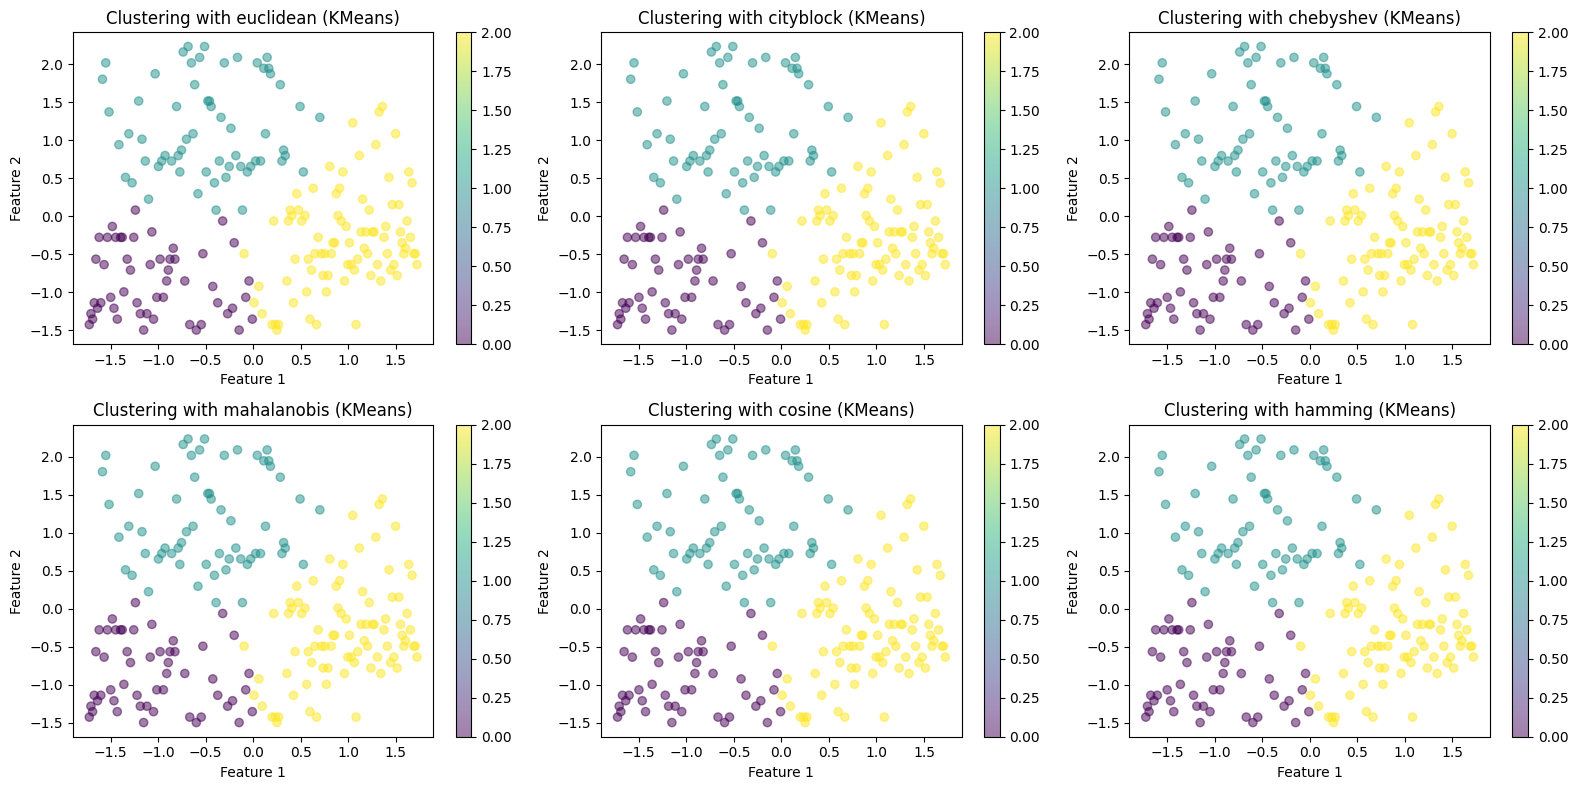

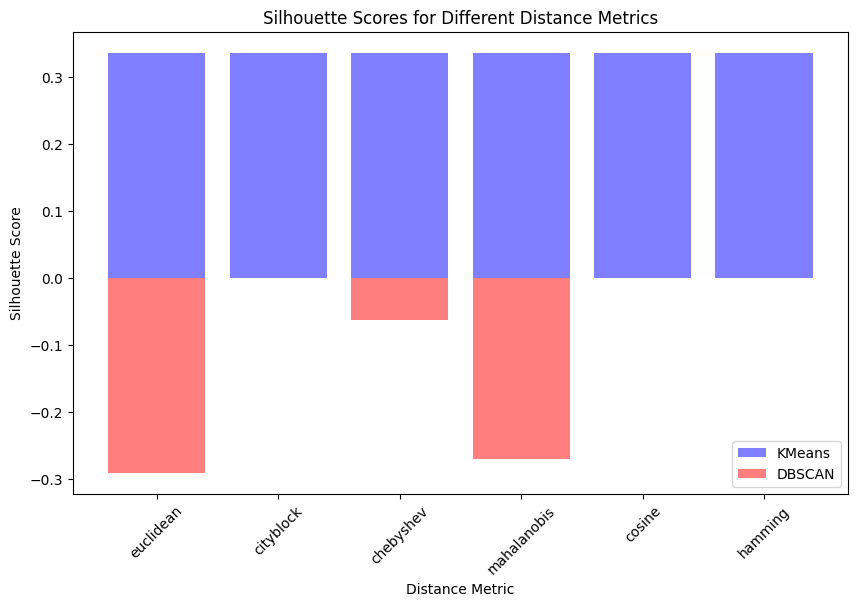

In [16]:
# Visualize the clustering results using scatter plots
plt.figure(figsize=(16, 8))
for i, (metric, result) in enumerate(results.items(), start=1):
    plt.subplot(2, 3, i)
    plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=result['KMeans Clusters'], cmap='viridis', alpha=0.5)
    plt.title(f"Clustering with {metric} (KMeans)")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()

plt.tight_layout()
plt.show()

# Plot silhouette scores for each distance metric
silhouette_scores_kmeans = [result['KMeans Silhouette Score'] for result in results.values()]
silhouette_scores_dbscan = [result['DBSCAN Silhouette Score'] for result in results.values()]

plt.figure(figsize=(10, 6))
plt.bar(distance_metrics, silhouette_scores_kmeans, color='blue', alpha=0.5, label='KMeans')
plt.bar(distance_metrics, silhouette_scores_dbscan, color='red', alpha=0.5, label='DBSCAN')
plt.title('Silhouette Scores for Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [17]:

print("Additional Information:")
for metric, result in results.items():
    print(f"Distance Metric: {metric}")
    print(f"Number of Clusters (KMeans): {len(set(result['KMeans Clusters']))}")
    print(f"Number of Outliers (DBSCAN): {sum(1 for label in result['DBSCAN Clusters'] if label == -1)}")
    print("-------------------------------------------------------")

Additional Information:
Distance Metric: euclidean
Number of Clusters (KMeans): 3
Number of Outliers (DBSCAN): 168
-------------------------------------------------------
Distance Metric: cityblock
Number of Clusters (KMeans): 3
Number of Outliers (DBSCAN): 200
-------------------------------------------------------
Distance Metric: chebyshev
Number of Clusters (KMeans): 3
Number of Outliers (DBSCAN): 110
-------------------------------------------------------
Distance Metric: mahalanobis
Number of Clusters (KMeans): 3
Number of Outliers (DBSCAN): 185
-------------------------------------------------------
Distance Metric: cosine
Number of Clusters (KMeans): 3
Number of Outliers (DBSCAN): 0
-------------------------------------------------------
Distance Metric: hamming
Number of Clusters (KMeans): 3
Number of Outliers (DBSCAN): 200
-------------------------------------------------------


# **TASK 2**

In [19]:
from sklearn.metrics import pairwise_distances_argmin_min


def perform_kmedoids_clustering():
 
    centroids_idx = np.random.choice(len(df_scaled), size=3, replace=False)
    centroids = df_scaled[centroids_idx]

   
    kmedoids_clusters, _ = pairwise_distances_argmin_min(df_scaled, centroids)

    silhouette = silhouette_score(df_scaled, kmedoids_clusters)

    return kmedoids_clusters, silhouette


kmedoids_clusters, silhouette_kmedoids = perform_kmedoids_clustering()
print(f"KMedoids Clusters: {kmedoids_clusters}")
print(f"Silhouette Score (KMedoids): {silhouette_kmedoids}")

KMedoids Clusters: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 0 2 2 0 2 2 0 2 0 0
 0 2 1 1 2 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
Silhouette Score (KMedoids): 0.27683107923781763


In [20]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

def perform_hierarchical_clustering(linkage_method):

    hierarchical = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
    hierarchical_clusters = hierarchical.fit_predict(df_scaled)

    silhouette = silhouette_score(df_scaled, hierarchical_clusters)
    
    return hierarchical_clusters, silhouette

In [21]:

hierarchical_approaches = ['single', 'complete', 'average', 'ward']


hierarchical_results = {}

In [22]:

for approach in hierarchical_approaches:
    hierarchical_clusters, silhouette = perform_hierarchical_clustering(approach)
    hierarchical_results[approach] = {
        'Clusters': hierarchical_clusters,
        'Silhouette Score': silhouette
    }

for approach, result in hierarchical_results.items():
    print(f"Hierarchical Clustering Approach: {approach}")
    print(f"Silhouette Score: {result['Silhouette Score']}")
    print("-------------------------------------------------------")

Hierarchical Clustering Approach: single
Silhouette Score: 0.0992019443008379
-------------------------------------------------------
Hierarchical Clustering Approach: complete
Silhouette Score: 0.32597593530402125
-------------------------------------------------------
Hierarchical Clustering Approach: average
Silhouette Score: 0.33346036423896935
-------------------------------------------------------
Hierarchical Clustering Approach: ward
Silhouette Score: 0.30874740679157575
-------------------------------------------------------


### **Visualize the clustering results**

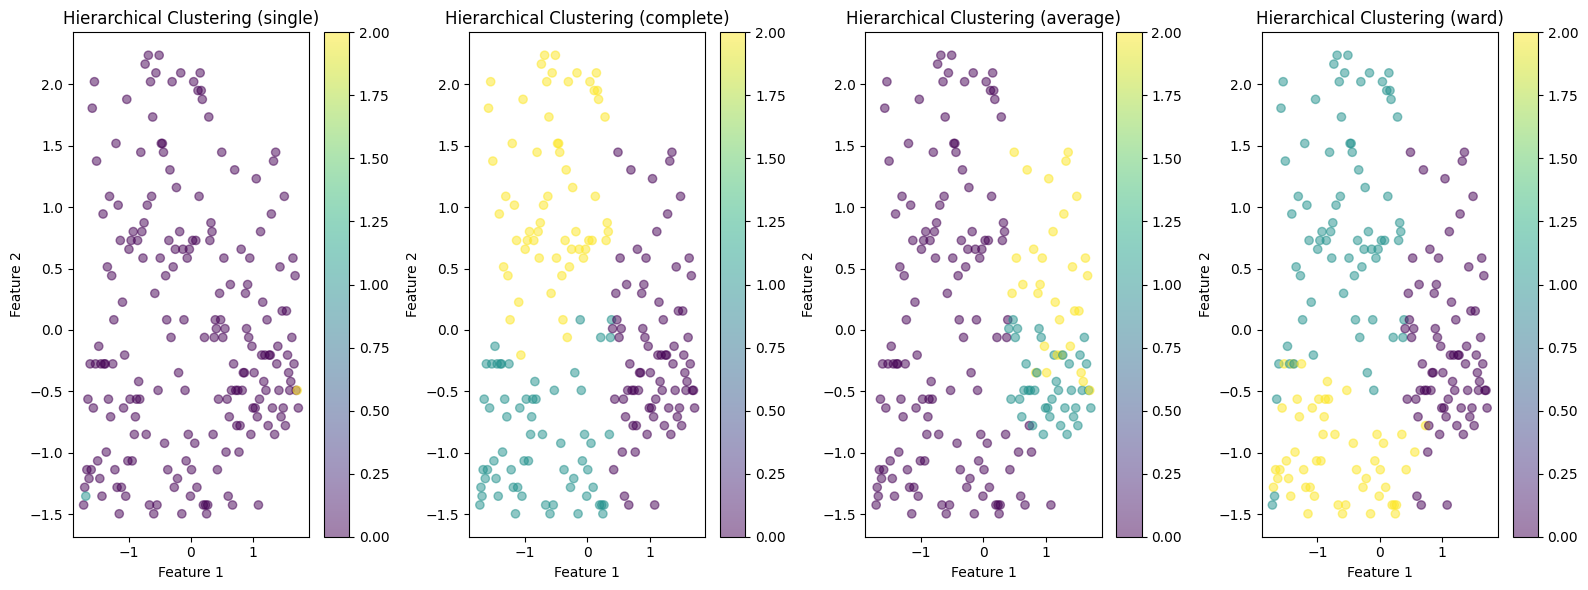

In [23]:

plt.figure(figsize=(16, 6))
for i, (approach, result) in enumerate(hierarchical_results.items(), start=1):
    plt.subplot(1, 4, i)
    plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=result['Clusters'], cmap='viridis', alpha=0.5)
    plt.title(f"Hierarchical Clustering ({approach})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()

plt.tight_layout()
plt.show()

### **Comparison Analysis**

In [24]:
# Compare with Task 1
print("Comparison with Task 1:")
for approach, result in hierarchical_results.items():
    print(f"Hierarchical Clustering Approach: {approach}")
    print(f"Silhouette Score: {result['Silhouette Score']}")
    print(f"Similarity with KMeans (Euclidean): {silhouette_score(df_scaled, results['euclidean']['KMeans Clusters'])}")
    print("-------------------------------------------------------")

Comparison with Task 1:
Hierarchical Clustering Approach: single
Silhouette Score: 0.0992019443008379
Similarity with KMeans (Euclidean): 0.33627250175154105
-------------------------------------------------------
Hierarchical Clustering Approach: complete
Silhouette Score: 0.32597593530402125
Similarity with KMeans (Euclidean): 0.33627250175154105
-------------------------------------------------------
Hierarchical Clustering Approach: average
Silhouette Score: 0.33346036423896935
Similarity with KMeans (Euclidean): 0.33627250175154105
-------------------------------------------------------
Hierarchical Clustering Approach: ward
Silhouette Score: 0.30874740679157575
Similarity with KMeans (Euclidean): 0.33627250175154105
-------------------------------------------------------


# **TASK 3**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to perform KMeans clustering and compute Silhouette score
def perform_kmeans_clustering(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_scaled)
    clusters = kmeans.predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, clusters)
    return silhouette_avg

### **Determine the optimal number of clusters and apply on both tasks**

In [27]:

def elbow_method(max_clusters):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(df_scaled)
        distortions.append(kmeans.inertia_)
    return distortions

### **Elbow method for both tasks**

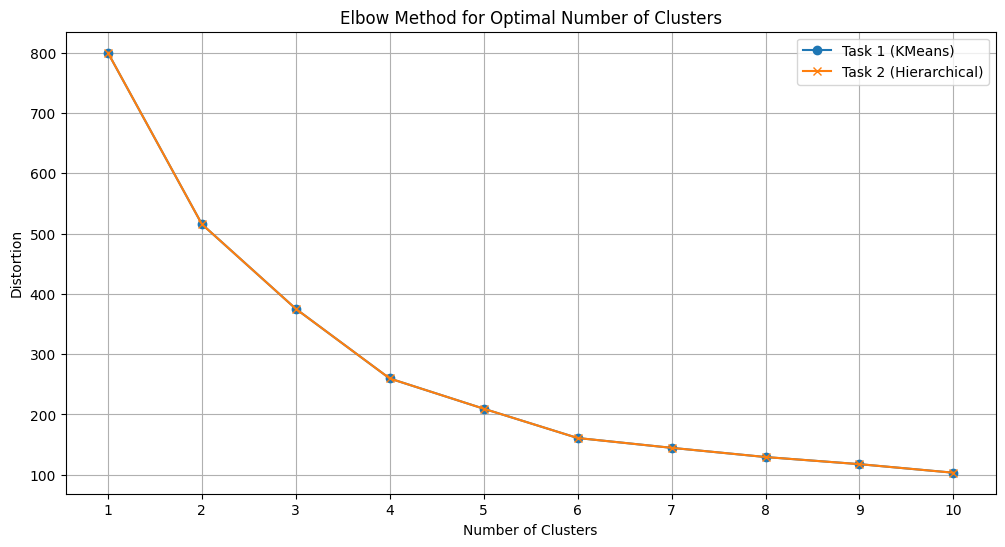

In [29]:

max_clusters = 10  
distortions_task1 = elbow_method(max_clusters)
distortions_task2 = elbow_method(max_clusters)


plt.figure(figsize=(12, 6))
plt.plot(range(1, max_clusters + 1), distortions_task1, marker='o', label='Task 1 (KMeans)')
plt.plot(range(1, max_clusters + 1), distortions_task2, marker='x', label='Task 2 (Hierarchical)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.xticks(np.arange(1, max_clusters + 1))
plt.legend()
plt.grid(True)
plt.show()

### **Silhouette scores for both tasks**

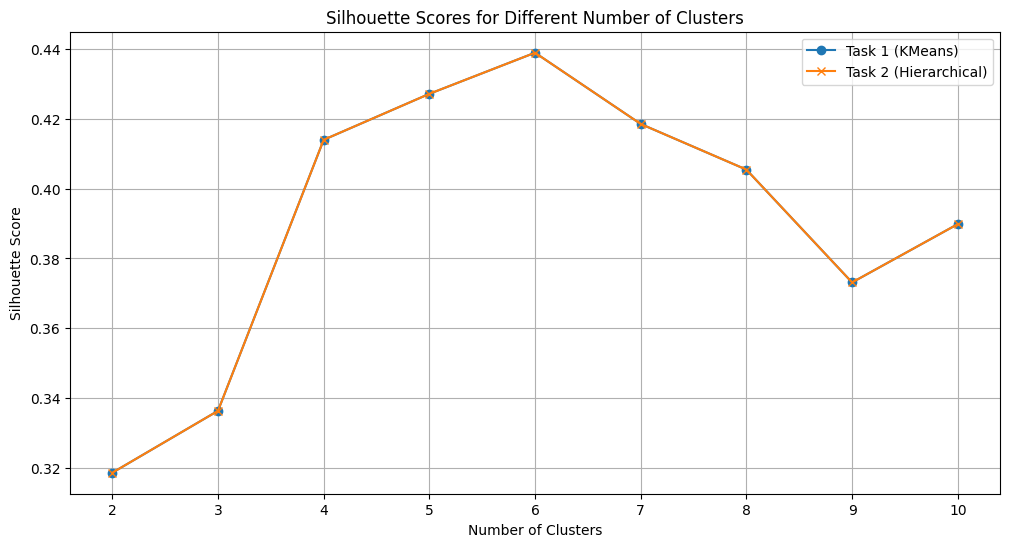

In [30]:
# Compute Silhouette scores for both tasks
silhouette_scores_task1 = [perform_kmeans_clustering(num_clusters) for num_clusters in range(2, max_clusters + 1)]
silhouette_scores_task2 = [perform_kmeans_clustering(num_clusters) for num_clusters in range(2, max_clusters + 1)]

# Plot Silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores_task1, marker='o', label='Task 1 (KMeans)')
plt.plot(range(2, max_clusters + 1), silhouette_scores_task2, marker='x', label='Task 2 (Hierarchical)')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, max_clusters + 1))
plt.legend()
plt.grid(True)
plt.show()